In [66]:
!pip install pandas
!pip install sklearn
!pip install seaborn
!pip install textdistance
!pip install networkx
!pip install markov_clustering
!pip install mlxtend

In [2]:
from platform import python_version
print(python_version())

3.7.6


In [1404]:
import pandas as pd
import markov_clustering as mc
import networkx as nx
import textdistance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [1448]:
cora = pd.read_csv("cora.csv", header=None, names=["trash1", "id", "authors", "trash2", "name", 
                                                   "trash3", "venue", "city", "venue2", "year",
                                                   "trash4", "trash5", "trash6", "trash7"])


In [1449]:
cora = cora.drop(["trash1", 'trash2', 'trash3', 'trash4', 'trash5', 'trash6', 'trash7'], axis=1)

In [3]:
df = pd.DataFrame(columns=["edit_title", "edit_authors", "edit_venue", "edit_year",
                        "jaro_winkler_title", "jaro_winkler_authors", "jaro_winkler_venue", "jaro_winkler_year",
                          "jaccard_title", "jaccard_authors", "jaccard_venue", "jaccard_year", 
                           #"monge_elkan_authors",
                           "answer"
                          ])

In [4]:
cora['Blocking_key'] = cora['name'].str.replace('[^a-zA-Z]', '').str.upper()

In [5]:
cora.head()

,trash1,id,authors,trash2,name,trash3,venue,city,venue2,year,trash4,trash5,trash6,trash7,Blocking_key
0,unknown,auer1995a,"p. auer, n. cesa-bianchi, y. freund, and r. e....",NaN,gambling in a rigged casino: the adversarial m...,NaN,in proc. 36th annual symposium on foundations ...,"los alamitos, ca:","ieee computer society press,","1995,",pp. 322-331.,NaN,NaN,NaN,GAMBLINGINARIGGEDCASINOTHEADVERSARIALMULTIARME...
1,unknown,blum1993,"a. blum, m. furst, m. j. kearns, and richard j...",NaN,cryptographic primitives based on hard learnin...,NaN,"in pre-proceedings of crypto '93,",NaN,NaN,1993,"pages 24.1-24.10,",NaN,NaN,NaN,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
2,unknown,blum1993,"avrim blum, merrick furst, michael kearns, and...",NaN,cryptographic primitives based on hard learnin...,NaN,"in pre-proceedings of crypto '93,",NaN,NaN,1993,"pages 24.1-24.10,",NaN,NaN,NaN,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
3,unknown,blum1993,"avrim blum, merrick furst, michael kearns, and...",NaN,cryptographic primitives based on hard learnin...,NaN,"proc. crypto 93,",NaN,"springer,",1994,pages 278-291.,"in douglas r. stinson, editor,",lecture notes in computer science no. 773.,NaN,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...
4,unknown,blum1993,"a. blum, m. furst, m. kearns, r. lipton.",NaN,cryptographic primitives based on hard learnin...,NaN,"crypto,",NaN,NaN,1993,NaN,NaN,NaN,NaN,CRYPTOGRAPHICPRIMITIVESBASEDONHARDLEARNINGPROB...


In [6]:
cora = cora.fillna("")

In [7]:
levenstein = textdistance.levenshtein
jaro_winkler = textdistance.jaro_winkler
jaccard = textdistance.jaccard
monge_elkan = textdistance.monge_elkan

In [47]:
#for k in range(len(keys)):
 #   slic = cora[cora['Blocking_key'] == keys[k]]
  #  print("k", k)
   # for i in range(slic.shape[0]):
    #    print("i", i)
     #   o1 = slic.iloc[i]
      #  for j in range(i + 1, slic.shape[0]):
       #     o2 = slic.iloc[j]
        #    df = df.append(pd.Series([levenstein(o1['name'], o2['name']),
         #         levenstein(o1['venue'], o2['venue']),
         #         levenstein(o1['year'], o2['year']),
         #         jaro_winkler(o1['name'], o2['name']),
         #         jaro_winkler(o1['authors'], o2['authors']),
         #         jaro_winkler(o1['venue'], o2['venue']),
         #         jaro_winkler(o1['year'], o2['year']),
         #         jaccard(o1['name'], o2['name']),
         #         jaccard(o1['authors'], o2['authors']),
         #         jaccard(o1['venue'], o2['venue']),
         #         jaccard(o1['year'], o2['year']),
         #         #monge_elkan(o1['authors'], o2['authors']),
         #         o1['id'] == o2['id']],
         #        index=df.columns), ignore_index=True
         #       )       

In [8]:
df = pd.read_csv("cora_features.csv")
df['answer'].value_counts()

True     13552
False     4234
Name: answer, dtype: int64

In [16]:
X = df.drop(['answer', 'edit_authors', 
             'jaccard_title', 'jaro_winkler_year', 'jaccard_authors'], axis=1)
y = df['answer'].astype(int)

In [419]:
X['answer'] = y
X

,edit_title,edit_venue,edit_year,jaro_winkler_authors,jaro_winkler_venue,jaccard_venue,jaccard_year,answer
0,0,0,0,0.770978,1.000000,1.000000,1.0,1
1,0,18,1,0.770978,0.463594,0.441176,0.6,1
2,0,26,0,0.905455,0.480880,0.212121,1.0,1
3,0,18,1,1.000000,0.463594,0.441176,0.6,1
4,0,26,0,0.687266,0.480880,0.212121,1.0,1
...,...,...,...,...,...,...,...,...
17781,0,82,4,0.952778,0.000000,0.000000,0.0,0
17782,0,82,4,0.952778,0.000000,0.000000,0.0,0
17783,0,82,4,0.952778,0.000000,0.000000,0.0,0
17784,0,82,4,0.952778,0.000000,0.000000,0.0,0


In [425]:
pca = PCA(n_components=2)
X = pca.fit(X).transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [35]:
gbt = GradientBoostingClassifier(n_estimators = 150, max_depth=5, learning_rate=0.5, min_samples_split=5)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [401]:
gbt.feature_importances_
a = pd.DataFrame({'feature' : list(X_train.columns), 'score' : list(gbt.feature_importances_)})
a.sort_values(by=['score'])

,feature,score
0,edit_title,0.012587
5,jaccard_authors,0.013715
3,jaro_winkler_authors,0.013923
1,edit_venue,0.062328
6,jaccard_venue,0.095696
2,edit_year,0.111059
7,jaccard_year,0.165508
4,jaro_winkler_venue,0.525184


In [36]:
f1_score(y_test, gbt.predict(X_test))

0.988116458704694

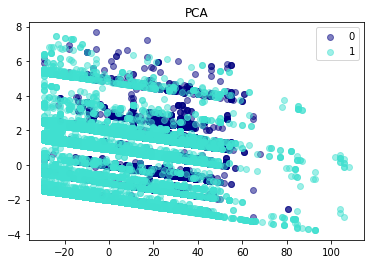

In [427]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 1
target_names = ['0', '1']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.5, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)

In [27]:
log_clf = LogisticRegression(random_state=42, max_iter = 1000)
log_clf.fit(X_train, y_train)

In [131]:
f1_score(y_test, list(gbt.predict(X_test)))

0.9782848730217152

In [134]:
gbt.feature_importances_
a = pd.DataFrame({'feature' : list(X_train.columns), 'score' : list(gbt.feature_importances_)})
a.sort_values(by=['score'])

In [1484]:
#acm = pd.read_csv("ACM.csv")
#dblp = pd.read_csv("DBLP2.csv", encoding='windows-1250')
perf_map = pd.read_csv("DBLP-Scholar_perfectMapping.csv")#, index_col = 'idScholar')
scholar = pd.read_csv("Scholar.csv")
dblp = pd.read_csv("DBLP1.csv", encoding='windows-1250')

In [1489]:
#Pipeline cora
dataset = scholar#dblp.append(scholar)

In [1490]:
#Pipeline
dataset = dataset.fillna("")

In [1491]:
#Pipeline
authors = dataset['authors'].map(lambda x: ''.join(sorted(gg.strip() for gg in list(map(str, x.split(','))))))

In [1493]:
#Pipeline
#dataset['sorted_authors'] = authors
dataset['authors'] = authors
authors

0                                            QD Inc
1                               AS ArgonJG Hannoosh
2        GH HansenH SjÃ¶strÃ¶mLL WetterbergO NorÃ©n
3                        P HarmonTM HammettW Rhodes
4                                        JR Cogdell
                            ...                    
64258                                    DS Cooling
64259                                     RW Taylor
64260                                 J KochM Jarke
64261                                         W Kim
64262                           S Amer-YahiaS Cluet
Name: authors, Length: 64263, dtype: object

In [1494]:
#Pipeline
dataset.head()

,id,title,authors,venue,year
0,aKcZKwvwbQwJ,11578 Sorrento Valley Road,QD Inc,"San Diego,",
1,ixKfiTHoaDoJ,Initiation of crazes in polystyrene,AS ArgonJG Hannoosh,"Phil. Mag,",
2,3BxllB4wwcIJ,Immunogold labelling is a quantitative method ...,GH HansenH SjÃ¶strÃ¶mLL WetterbergO NorÃ©n,"The Histochemical Journal,",1992
3,d2WWxwKMex4J,The Burden of Infectious Disease Among Inmates...,P HarmonTM HammettW Rhodes,see,
4,cZCX-AQpjccJ,The Role of Faculty Advising in Science and En...,JR Cogdell,"NEW DIRECTIONS FOR TEACHING AND LEARNING,",1995


In [1495]:
#Pipeline
#for scholar
dataset['year'] = dataset['year'].astype(str)
dataset['Blocking_key'] = dataset['title'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['venue'] = dataset['venue'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['authors'] = dataset['authors'].str.replace('[^a-zA-Z]', '').str.upper()
dataset['title'] = dataset['title'].str.replace('[^a-zA-Z]', '').str.upper()

In [1496]:
dataset.head(10)

,id,title,authors,venue,year,Blocking_key
0,aKcZKwvwbQwJ,SORRENTOVALLEYROAD,QDINC,SANDIEGO,,SORRENTOVALLEYROAD
1,ixKfiTHoaDoJ,INITIATIONOFCRAZESINPOLYSTYRENE,ASARGONJGHANNOOSH,PHILMAG,,INITIATIONOFCRAZESINPOLYSTYRENE
2,3BxllB4wwcIJ,IMMUNOGOLDLABELLINGISAQUANTITATIVEMETHODASDEMO...,GHHANSENHSJSTRMLLWETTERBERGONORN,THEHISTOCHEMICALJOURNAL,1992.0,IMMUNOGOLDLABELLINGISAQUANTITATIVEMETHODASDEMO...
3,d2WWxwKMex4J,THEBURDENOFINFECTIOUSDISEASEAMONGINMATESANDREL...,PHARMONTMHAMMETTWRHODES,SEE,,THEBURDENOFINFECTIOUSDISEASEAMONGINMATESANDREL...
4,cZCX-AQpjccJ,THEROLEOFFACULTYADVISINGINSCIENCEANDENGINEERING,JRCOGDELL,NEWDIRECTIONSFORTEACHINGANDLEARNING,1995.0,THEROLEOFFACULTYADVISINGINSCIENCEANDENGINEERING
5,DMhfVNSDYD4J,THEZEROMULTIPLICITYOFLINEARRECURRENCESEQUENCES,WMSCHMIDT,TO,,THEZEROMULTIPLICITYOFLINEARRECURRENCESEQUENCES
6,97wRWOpnANkJ,PREDICITVEVALIDITYOFKINDERGARTENSCREENERSFORYO...,RAHAATS,,2002.0,PREDICITVEVALIDITYOFKINDERGARTENSCREENERSFORYO...
7,xSv97kdDZU8J,THEPHOTOSYNTHETICREACTIONCENTER,JDEISENHOFERJRNORRIS,SANDIEGOACADEMIC,,THEPHOTOSYNTHETICREACTIONCENTER
8,vj0-A5RoktIJ,FDIENEAWNDIAYEYHACHAGELINAIRESCALABLEETDISTRIB...,FBENNOUR,RESREPCERIAUPARIS,,FDIENEAWNDIAYEYHACHAGELINAIRESCALABLEETDISTRIB...
9,6TKMB5gO9EoJ,MULTIDIMENSIONALSIMILARITYSTRUCTUREANALYSIS,IBORGJCLINGOES,,1987.0,MULTIDIMENSIONALSIMILARITYSTRUCTUREANALYSIS


In [1497]:
#Pipeline
ids = list(perf_map['idScholar'])

In [1498]:
#Pipeline
tmp = dataset[dataset['id'].isin(ids)]

In [1499]:
#Pipeline
filter_keys = list(tmp['Blocking_key'].unique())

In [1500]:
#Pipeline
dataset = dataset[dataset['Blocking_key'].isin(filter_keys)]

In [1501]:
dataset.shape

(5352, 6)

In [1502]:
#Pipeline
perf_map = perf_map.set_index('idScholar')

In [1503]:
#Pipeline
perf_map.head(1)

,idDBLP
idScholar,
f2Lea-RN8dsJ,conf/sigmod/AbadiC02


In [1504]:
#Pipeline
valid_group = dataset.groupby(['Blocking_key']).aggregate({'Blocking_key' : ['count']})

In [1571]:
#Pipeline
key_set  = valid_group[valid_group[('Blocking_key', 'count')] > 2].index.values

In [1572]:
#Pipeline
valid_keys = set(dataset['Blocking_key'].unique())
key_set = key_set[1:]

In [1575]:
len(key_set)

204

In [1576]:
#Pipeline
features = pd.DataFrame(columns=["i", "j", "edit_title", "edit_authors", "edit_venue", "edit_year",
                        "jaro_winkler_title", "jaro_winkler_authors", "jaro_winkler_venue", "jaro_winkler_year",
                          "jaccard_title", "jaccard_authors", "jaccard_venue", "jaccard_year", 
                           #"monge_elkan_authors",
                           "diff_year",
                           "answer",
                           "Blocking_key"
                          ])

In [1577]:
#Pipeline
#for scholar
for elem in key_set:
    print(elem)
    block = dataset[dataset['Blocking_key'] == elem]
    for i in range(len(block)):
        o1 = block.iloc[i]
        for j in range(i + 1, len(block)):
            o2 = block.iloc[j]
            ans = 0
            if o1['id'] in perf_map.index and o2['id'] in perf_map.index:
                b1 = perf_map.loc[o1['id']]
                if b1.shape[0] > 1:
                    c_1 = b1['idDBLP'][0]
                else:
                    c_1 = b1[0]
                b2 = perf_map.loc[o1['id']]
                if b2.shape[0] > 1:
                    c_2 = b2['idDBLP'][0]
                else:
                    c_2 = b2[0]
                print(c_1, c_2)
                if c_1 == c_2:
                    ans = 1
            diff_year = 0.0
            try:
                f1 = float(o1['year'])
                f2 = float(o2['year'])
                diff_year = 1.0 - abs(f1 - f2) / max(f1, f2)
            except Exception:
                print("Exception")
            row = pd.Series([i, j, 
                   levenstein(o1['title'], o2['title']) / (max(len(o1['title']), len(o2['title'])) + 1),
                   levenstein(o1['authors'], o2['authors']) / (max(len(o1['authors']), len(o2['authors'])) + 1),
                   levenstein(o1['venue'], o2['venue']) / (max(len(o1['venue']), len(o2['venue'])) + 1),
                   levenstein(o1['year'], o2['year']) / (max(len(o1['year']), len(o2['year'])) + 1),
                   jaro_winkler(o1['title'], o2['title']),
                   jaro_winkler(o1['authors'], o2['authors']),
                   jaro_winkler(o1['venue'], o2['venue']),
                   jaro_winkler(o1['year'], o2['year']),
                   jaccard(o1['title'], o2['title']),
                   jaccard(o1['authors'], o2['authors']),
                   jaccard(o1['venue'], o2['venue']),
                   jaccard(o1['year'], o2['year']),
                   diff_year,
                   #monge_elkan(o1['authors'], o2['authors']),
                   ans,
                   elem],
                 index=features.columns)
            features = features.append(row, ignore_index=True)           

ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
journals/sigmod/JensenCEGHJ94 journals/sigmod/JensenCEGHJ94
journals/sigmod/JensenCEGHJ94 journals/sigmod/JensenCEGHJ94
journals/sigmod/JensenCEGHJ94 journals/sigmod/JensenCEGHJ94
ACRITIQUEOFANSISQLISOLATIONLEVELS
conf/sigmod/BerensonBGMOO95 conf/sigmod/BerensonBGMOO95
Exception
conf/sigmod/BerensonBGMOO95 conf/sigmod/BerensonBGMOO95
Exception
conf/sigmod/BerensonBGMOO95 conf/sigmod/BerensonBGMOO95
Exception
ADATAMODELANDDATASTRUCTURESFORMOVINGOBJECTSDATABASES
conf/sigmod/ForlizziGNS00 conf/sigmod/ForlizziGNS00
Exception
conf/sigmod/ForlizziGNS00 conf/sigmod/ForlizziGNS00
Exception
conf/sigmod/ForlizziGNS00 conf/sigmod/ForlizziGNS00
Exception
ADEPTANAGENTBASEDAPPROACHTOBUSINESSPROCESSMANAGEMENT
Exception
Exception
journals/sigmod/JenningsNF98 journals/sigmod/JenningsNF98
ADISTRIBUTEDSCIENTIFICDATAARCHIVEUSINGTHEWEBXMLANDSQLMED
journals/sigmod/PapianiWDN99 journals/sigmod/PapianiWDN99
Exception
journals/sigmod/PapianiWDN99 journals/sigmod/Pap

conf/sigmod/AgrawalGGR98 conf/sigmod/AgrawalGGR98
Exception
conf/sigmod/AgrawalGGR98 conf/sigmod/AgrawalGGR98
Exception
BALANCINGHISTOGRAMOPTIMALITYANDPRACTICALITYFORQUERYRESULTSIZEESTIMATION
conf/sigmod/IoannidisP95 conf/sigmod/IoannidisP95
Exception
conf/sigmod/IoannidisP95 conf/sigmod/IoannidisP95
conf/sigmod/IoannidisP95 conf/sigmod/IoannidisP95
Exception
BALANCINGPUSHANDPULLFORDATABROADCAST
conf/sigmod/AcharyaFZ97 conf/sigmod/AcharyaFZ97
Exception
conf/sigmod/AcharyaFZ97 conf/sigmod/AcharyaFZ97
Exception
conf/sigmod/AcharyaFZ97 conf/sigmod/AcharyaFZ97
Exception
BENCHMARKINGSPATIALJOINOPERATIONSWITHSPATIALOUTPUT
conf/vldb/HoelS95 conf/vldb/HoelS95
conf/vldb/HoelS95 conf/vldb/HoelS95
Exception
conf/vldb/HoelS95 conf/vldb/HoelS95
Exception
BEYONDMARKETBASKETSGENERALIZINGASSOCIATIONRULESTOCORRELATIONS
conf/sigmod/BrinMS97 conf/sigmod/BrinMS97
Exception
conf/sigmod/BrinMS97 conf/sigmod/BrinMS97
Exception
conf/sigmod/BrinMS97 conf/sigmod/BrinMS97
Exception
BIRCHANEFFICIENTDATACLUSTERING

conf/vldb/HanF95 conf/vldb/HanF95
Exception
DISSEMINATINGUPDATESONBROADCASTDISKS
conf/vldb/AcharyaFZ96 conf/vldb/AcharyaFZ96
Exception
conf/vldb/AcharyaFZ96 conf/vldb/AcharyaFZ96
Exception
conf/vldb/AcharyaFZ96 conf/vldb/AcharyaFZ96
Exception
DISTANCEBROWSINGINSPATIALDATABASES
journals/tods/HjaltasonS99 journals/tods/HjaltasonS99
Exception
journals/tods/HjaltasonS99 journals/tods/HjaltasonS99
Exception
journals/tods/HjaltasonS99 journals/tods/HjaltasonS99
Exception
DWARFSHRINKINGTHEPETACUBE
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
conf/sigmod/SismanisDRK02 conf/sigmod/SismanisDRK02
Exception
DYNAMATADYNAMICVIEWMANAGEMENTSYSTEMFORDATAWAREHOUSES
conf/sigmod/KotidisR99 conf/sigmod/KotidisR99
Exception
conf/sigmod/KotidisR99 

GUESTEDITORIAL
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
journals/vldb/AtzeniM00 journals/vldb/AtzeniM00
journals/vldb/AtzeniM00 journals/vldb/AtzeniM00
journals/vldb/AtzeniM00 journals/vldb/AtzeniM00
Exception
journals/vldb/AtzeniM00 journals/vldb/AtzeniM00
journals/vldb/AtzeniM00 journals/vldb/AtzeniM00
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
Exception
journals/vldb/BernsteinIR03 journals/vldb/BernsteinIR03
journals/vldb/BernsteinIR03 journals/vldb/BernsteinIR03
Exception
journals/vldb/BernsteinIR03 journ

journals/sigmod/ONeilG95 journals/sigmod/ONeilG95
Exception
journals/sigmod/ONeilG95 journals/sigmod/ONeilG95
Exception
journals/sigmod/ONeilG95 journals/sigmod/ONeilG95
Exception
journals/sigmod/ONeilG95 journals/sigmod/ONeilG95
Exception
journals/sigmod/ONeilG95 journals/sigmod/ONeilG95
NEARESTNEIGHBORQUERIES
conf/sigmod/RoussopoulosKV95 conf/sigmod/RoussopoulosKV95
Exception
conf/sigmod/RoussopoulosKV95 conf/sigmod/RoussopoulosKV95
Exception
conf/sigmod/RoussopoulosKV95 conf/sigmod/RoussopoulosKV95
Exception
NEARNEIGHBORSEARCHINLARGEMETRICSPACES
conf/vldb/Brin95 conf/vldb/Brin95
Exception
conf/vldb/Brin95 conf/vldb/Brin95
Exception
conf/vldb/Brin95 conf/vldb/Brin95
Exception
NIAGARACQASCALABLECONTINUOUSQUERYSYSTEMFORINTERNETDATABASES
conf/sigmod/ChenJDTW00 conf/sigmod/ChenJDTW00
Exception
conf/sigmod/ChenJDTW00 conf/sigmod/ChenJDTW00
Exception
conf/sigmod/ChenJDTW00 conf/sigmod/ChenJDTW00
Exception
ONLINEAGGREGATION
Exception
Exception
conf/sigmod/HellersteinHW97 conf/sigmod/Hellers

RTREEBASEDINDEXINGOFNOWRELATIVEBITEMPORALDATA
conf/vldb/BliujuteJSS98 conf/vldb/BliujuteJSS98
Exception
conf/vldb/BliujuteJSS98 conf/vldb/BliujuteJSS98
Exception
conf/vldb/BliujuteJSS98 conf/vldb/BliujuteJSS98
Exception
SELECTIVITYESTIMATIONINSPATIALDATABASES
conf/sigmod/AcharyaPR99 conf/sigmod/AcharyaPR99
Exception
conf/sigmod/AcharyaPR99 conf/sigmod/AcharyaPR99
Exception
conf/sigmod/AcharyaPR99 conf/sigmod/AcharyaPR99
Exception
SELFSIMILARITYINTHEWEB
conf/vldb/DillKMRST01 conf/vldb/DillKMRST01
Exception
conf/vldb/DillKMRST01 conf/vldb/DillKMRST01
conf/vldb/DillKMRST01 conf/vldb/DillKMRST01
Exception
SEMISTRUCTUREDANDSTRUCTUREDDATAINTHEWEBGOINGBACKANDFORTH
journals/sigmod/AtzeniMM97 journals/sigmod/AtzeniMM97
Exception
journals/sigmod/AtzeniMM97 journals/sigmod/AtzeniMM97
Exception
journals/sigmod/AtzeniMM97 journals/sigmod/AtzeniMM97
Exception
SIMILARITYBASEDQUERIESFORTIMESERIESDATA
conf/sigmod/RafieiM97 conf/sigmod/RafieiM97
Exception
conf/sigmod/RafieiM97 conf/sigmod/RafieiM97
conf

conf/sigmod/HernandezS95 conf/sigmod/HernandezS95
Exception
conf/sigmod/HernandezS95 conf/sigmod/HernandezS95
Exception
THEMIDDLEWAREMUDDLE
Exception
Exception
Exception
THEOASISMULTIDATABASEPROTOTYPE
journals/sigmod/RoantreeMH99 journals/sigmod/RoantreeMH99
journals/sigmod/RoantreeMH99 journals/sigmod/RoantreeMH99
journals/sigmod/RoantreeMH99 journals/sigmod/RoantreeMH99
THEREACHACTIVEOODBMS
conf/sigmod/BuchmannDZH95 conf/sigmod/BuchmannDZH95
Exception
conf/sigmod/BuchmannDZH95 conf/sigmod/BuchmannDZH95
Exception
Exception
conf/sigmod/BuchmannDZH95 conf/sigmod/BuchmannDZH95
Exception
Exception
Exception
THEWHIPSPROTOTYPEFORDATAWAREHOUSECREATIONANDMAINTENANCE
conf/sigmod/LabioZWGGW97 conf/sigmod/LabioZWGGW97
Exception
conf/sigmod/LabioZWGGW97 conf/sigmod/LabioZWGGW97
Exception
conf/sigmod/LabioZWGGW97 conf/sigmod/LabioZWGGW97
THEXTREEANINDEXSTRUCTUREFORHIGHDIMENSIONALDATA
conf/vldb/BerchtoldKK96 conf/vldb/BerchtoldKK96
Exception
conf/vldb/BerchtoldKK96 conf/vldb/BerchtoldKK96
Exception

In [1578]:
features['answer'].value_counts()

1    775
0    678
Name: answer, dtype: int64

In [1579]:
features1 = features

In [1580]:
features = features1.drop(['edit_title', 'jaccard_title', 'jaro_winkler_title',
                           'jaro_winkler_year',
                            'jaro_winkler_venue'], axis=1)

In [1650]:
features.head()

,i,j,edit_authors,edit_venue,edit_year,jaro_winkler_authors,jaccard_authors,jaccard_venue,jaccard_year,diff_year,answer,Blocking_key
0,0,1,0.820513,0.000000,0.000000,0.591165,0.210526,1,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
1,0,2,0.555556,0.187500,0.000000,0.583333,0.333333,0.8,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
2,1,2,0.769231,0.187500,0.000000,0.842105,0.210526,0.8,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
3,0,1,0.687500,0.982456,0.857143,0.544542,0.314286,0,0,0.0,1,ACRITIQUEOFANSISQLISOLATIONLEVELS
4,0,2,0.812500,0.976744,0.000000,0.411111,0.105263,0,1,0.0,1,ACRITIQUEOFANSISQLISOLATIONLEVELS


In [1651]:
#!!! for scala
features.drop(['i', 'j'], axis=1).to_csv("/home/ivan/Dedup-bycicle/DBLP_features.csv", index = False)

In [1581]:
#Pipeline
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=42)

In [1582]:
features.head(5)

,i,j,edit_authors,edit_venue,edit_year,jaro_winkler_authors,jaccard_authors,jaccard_venue,jaccard_year,diff_year,answer,Blocking_key
0,0,1,0.820513,0.000000,0.000000,0.591165,0.210526,1,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
1,0,2,0.555556,0.187500,0.000000,0.583333,0.333333,0.8,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
2,1,2,0.769231,0.187500,0.000000,0.842105,0.210526,0.8,1,1.0,1,ACONSENSUSGLOSSARYOFTEMPORALDATABASECONCEPTS
3,0,1,0.687500,0.982456,0.857143,0.544542,0.314286,0,0,0.0,1,ACRITIQUEOFANSISQLISOLATIONLEVELS
4,0,2,0.812500,0.976744,0.000000,0.411111,0.105263,0,1,0.0,1,ACRITIQUEOFANSISQLISOLATIONLEVELS


In [1583]:
#Pipeline
for i1, i2 in rs.split(key_set):
    train_indices, test_indices = i1, i2

In [1584]:
#Pipeline
train_keys = key_set[train_indices]

In [1585]:
#Pipeline
test_keys = key_set[test_indices]

In [1586]:
#Pipeline
train = features[features['Blocking_key'].apply(lambda x: x in list(train_keys))]

In [1587]:
#Pipeline
test = features[features['Blocking_key'].apply(lambda x: x in list(test_keys))]

In [1632]:
X_train = train.drop(['Blocking_key', 'i', 'j', 'answer'], axis=1)
y_train = train['answer'].astype(int)
X_test = test.drop(['answer'], axis=1)
y_test = test['answer'].astype(int)

In [1607]:
#####Аналитика
X_test = X_test.drop(['Blocking_key', 'i', 'j'], axis=1)

In [1633]:
gbt = GradientBoostingClassifier(n_estimators = 100, max_depth=6, learning_rate=0.3,
                                 min_samples_split=3, min_samples_leaf=5)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1606]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=4, min_samples_leaf=4, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [1612]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [1613]:
f1_score(y_test, svc.predict(X_test))

0.7360308285163776

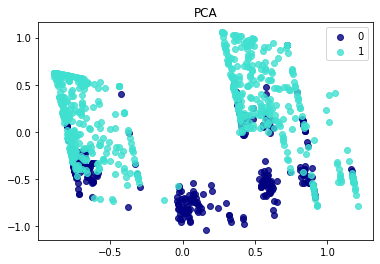

In [1590]:
pca = PCA(n_components=2)
X = X_train
X = pca.fit(X).transform(X)
y = y_train
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 1
target_names = ['0', '1']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

In [1592]:
gbt.feature_importances_
a = pd.DataFrame({'feature' : list(X_train.columns), 'score' : list(gbt.feature_importances_)})
a.sort_values(by=['score'])

,feature,score
2,edit_year,0.010455
6,jaccard_year,0.018585
7,diff_year,0.072353
5,jaccard_venue,0.093581
0,edit_authors,0.110442
1,edit_venue,0.120511
4,jaccard_authors,0.132592
3,jaro_winkler_authors,0.441481


In [1615]:
log_clf = LogisticRegression(random_state=42, max_iter = 1000)

In [1616]:
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1057]:
#Pipeline
log_clf = LogisticRegression(random_state=42, max_iter = 1000)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1634]:
#Pipeline
G_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
center_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
merge_center_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])
mG_pred_total = pd.DataFrame(columns=['i', 'j', "answer" ])

In [1635]:
#Pipeline
center_list = list()

In [1636]:
#Pipeline
big_G = nx.Graph()
big_mG = nx.Graph()

In [1637]:
#Pipeline
valid_dataset = X_test
clf = gbt
for k in sorted(test_keys):
    print(k)
    center_list = list()
    G_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    mG_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    center_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    merge_center_pred = pd.DataFrame(columns=['i', 'j', "answer" ])
    block = valid_dataset[valid_dataset['Blocking_key'] == k]
    block = block.drop(['Blocking_key'], axis=1)
    #block = block[['edit_title',
 #'edit_authors',
 #'edit_year',
 #'jaro_winkler_authors',
 #'jaro_winkler_year',
 #'jaccard_title',
 #'jaccard_authors',
 #'jaccard_venue', 'i', 'j']]
    G = nx.Graph()
    mG = nx.Graph()
    for e in range(len(block)):
        row = block.iloc[e]
        i = row['i']
        j = row['j']
        row = row.drop(['i', 'j'])
        pr_ans = clf.predict([row])[0]
        wght = clf.predict_proba([row])[0][1]
        if wght > 0.5:
            center_list.append([i, j])
        mG.add_edge(i, j, weight = wght)
        if pr_ans == 1:
            G.add_edge(i, j)
            print(i, j)
        G_pred = G_pred.append(pd.Series([i, j, 0], index=G_pred.columns), ignore_index=True)
        center_pred = center_pred.append(pd.Series([i, j, 0], index=center_pred.columns), ignore_index=True)
        merge_center_pred = merge_center_pred.append(pd.Series([i, j, 0], index=merge_center_pred.columns), ignore_index=True)
        mG_pred = mG_pred.append(pd.Series([i, j, 0], index=G_pred.columns), ignore_index=True)
    
    
    big_G = nx.disjoint_union(big_G, G) 
    
    #Connected Components
    con_comps = nx.connected_components(G)
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = G_pred[(G_pred['i'] == comp[i]) & (G_pred['j'] == comp[j])].index[0]
                G_pred.at[index, 'answer'] = 1
                
    G_pred_total = G_pred_total.append(G_pred)
    
    
    #Center
    con_comps = center(center_list)
    
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = center_pred[(center_pred['i'] == comp[i]) & (center_pred['j'] == comp[j])].index[0]
                center_pred.at[index, 'answer'] = 1
                
    center_pred_total = center_pred_total.append(center_pred)
    
    
    
    #Merge_Center
    con_comps = merge_center(center_list)
    
    for elem in con_comps:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                index = merge_center_pred[(merge_center_pred['i'] == comp[i]) & (merge_center_pred['j'] == comp[j])].index[0]
                merge_center_pred.at[index, 'answer'] = 1
                
    merge_center_pred_total = merge_center_pred_total.append(merge_center_pred)
    
    
    #Markov Clustering
    matrix = nx.to_scipy_sparse_matrix(mG)
    result = mc.run_mcl(matrix)
    clusters = mc.get_clusters(result)
    for elem in clusters:
        comp = sorted(list(elem))
        for i in range(len(comp)):
            for j in range(i + 1, len(comp)):
                try:
                    index = mG_pred[(mG_pred['i'] == comp[i]) & (mG_pred['j'] == comp[j])].index[0]
                    mG_pred.at[index, 'answer'] = 1
                except Exception:
                    print("Exception")
    mG_pred_total = mG_pred_total.append(mG_pred)

AMALGAMATINGKNOWLEDGEBASES
0 1
0 2
1 2
ANINTRODUCTIONTOSPATIALDATABASESYSTEMS
0 1
0 2
1 2
ANOVERVIEWOFDATAWAREHOUSINGANDOLAPTECHNOLOGY
0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
6 7
ANSWERINGQUERIESWITHAGGREGATIONUSINGVIEWS
0 1
0 2
0 3
1 2
1 3
2 3
APEXANADAPTIVEPATHINDEXFORXMLDATA
0 1
0 2
0 3
1 2
1 3
2 3
AUTOMATICSUBSPACECLUSTERINGOFHIGHDIMENSIONALDATAFORDATAMININGAPPLICATIONS
0 1
0 2
0 3
1 2
1 3
2 3
BIRCHANEFFICIENTDATACLUSTERINGMETHODFORVERYLARGEDATABASES
0 1
0 2
0 3
1 2
1 3
2 3
BOOKREVIEWCOLUMN
0 1
0 2
0 3
0 4
0 6
1 2
1 3
1 4
1 5
1 6
2 3
2 4
2 5
2 6
3 4
3 5
3 6
4 5
4 6
5 6
COLORINGAWAYCOMMUNICATIONINPARALLELQUERYOPTIMIZATION
0 1
0 2
1 2
COVERYOURASSETS
DIMENSIONALITYREDUCTIONFORSIMILARITYSEARCHINGINDYNAMICDATABASES
0 1
0 2
1 2
DISCOVERINGINTERNETMARKETINGINTELLIGENCETHROUGHONLINEANALYTICALWEBUSAGEMINING
0 1
0 2
0 3
1 2
1 3
2 3
DWARFSHRINKINGTHEPETACUBE
0 1
0 2
0 3
1 2
1 3
2 3
EDDIESCONTINUOUSLYADAPTIVEQUERYPROCESSING
0 1
EDITO

In [1050]:
#Pipeline
def center(center_list):
    cG = nx.Graph()
    center_list = sorted(center_list, reverse=True)
    for elem in center_list:
        centers = [x[0] for x in list(cG.nodes.data('center')) if (x[1] == True)]
        vertices = cG.nodes()
        if elem[0] in centers and elem[1] not in vertices:
            cG.add_edge(elem[0], elem[1])
        elif elem[1] in centers and elem[0] not in vertices:
            cG.add_edge(elem[0], elem[1])
        elif elem[0] in vertices or elem[1] in vertices:
            continue
        else:
            cG.add_node(elem[0], center=True)
            cG.add_edge(elem[0], elem[1])
    return nx.connected_components(cG)

In [1082]:
#Pipeline
def merge_center(center_list):
    cG = nx.Graph()
    center_list = sorted(center_list, reverse=True)
    for elem in center_list:
        centers = [x[0] for x in list(cG.nodes.data('center')) if (x[1] == True)]
        vertices = cG.nodes()
        if elem[0] in centers:
            cG.add_edge(elem[0], elem[1])
        elif elem[1] in centers:
            cG.add_edge(elem[0], elem[1])
        elif elem[0] in vertices or elem[1] in vertices:
            continue
        else:
            cG.add_node(elem[0], center=True)
            cG.add_edge(elem[0], elem[1])
    return nx.connected_components(cG)

In [1638]:
#Pipeline
X_test = X_test.drop(['i', 'j', 'Blocking_key'], axis=1)

In [1639]:
#Pipeline
f1_score(y_test, list(G_pred_total['answer']))

0.6066066066066066

In [1640]:
#Pipeline
f1_score(y_test, list(center_pred_total['answer']))

0.6292134831460674

In [1641]:
#Pipeline
f1_score(y_test, list(merge_center_pred_total['answer']))

0.6292134831460674

In [1642]:
#Pipeline
f1_score(y_test, list(mG_pred_total['answer']))

0.617737003058104

In [1643]:
#Pipeline
f1_score(y_test, clf.predict(X_test))

0.7572815533980582

In [1644]:
#Pipeline
recall_score(y_test, list(G_pred_total['answer']))

0.9853658536585366

In [1645]:
#Pipeline
recall_score(y_test, list(center_pred_total['answer']))

0.9560975609756097

In [1646]:
#Pipeline
recall_score(y_test, list(merge_center_pred_total['answer']))

0.9560975609756097

In [1647]:
#Pipeline
recall_score(y_test, list(mG_pred_total['answer']))

0.9853658536585366

In [1648]:
#Pipeline
recall_score(y_test, clf.predict(X_test))

0.9512195121951219

In [1116]:
G_pred

,i,j,answer
0,0,1,1
1,0,2,1
2,0,3,1
3,1,2,1
4,1,3,1
5,2,3,1


In [638]:
result = mc.run_mcl(matrix) 

In [639]:
clusters = mc.get_clusters(result)

In [648]:
list((clusters[0]))

[0]

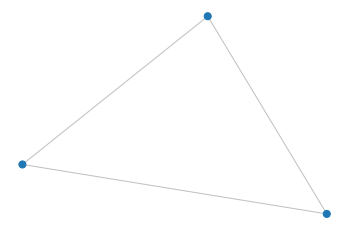

In [133]:
mc.draw_graph(matrix, clusters, node_size=50, with_labels=False, edge_color="silver")

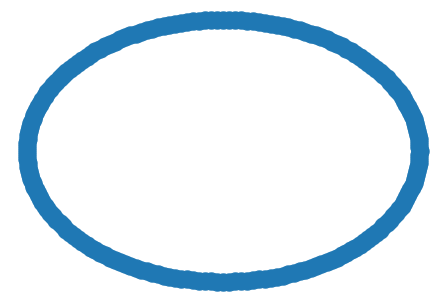

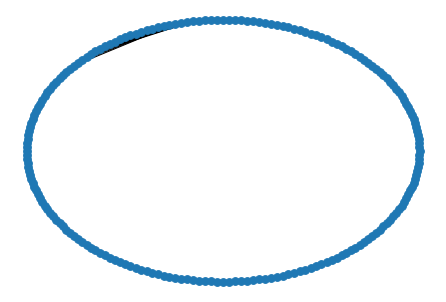

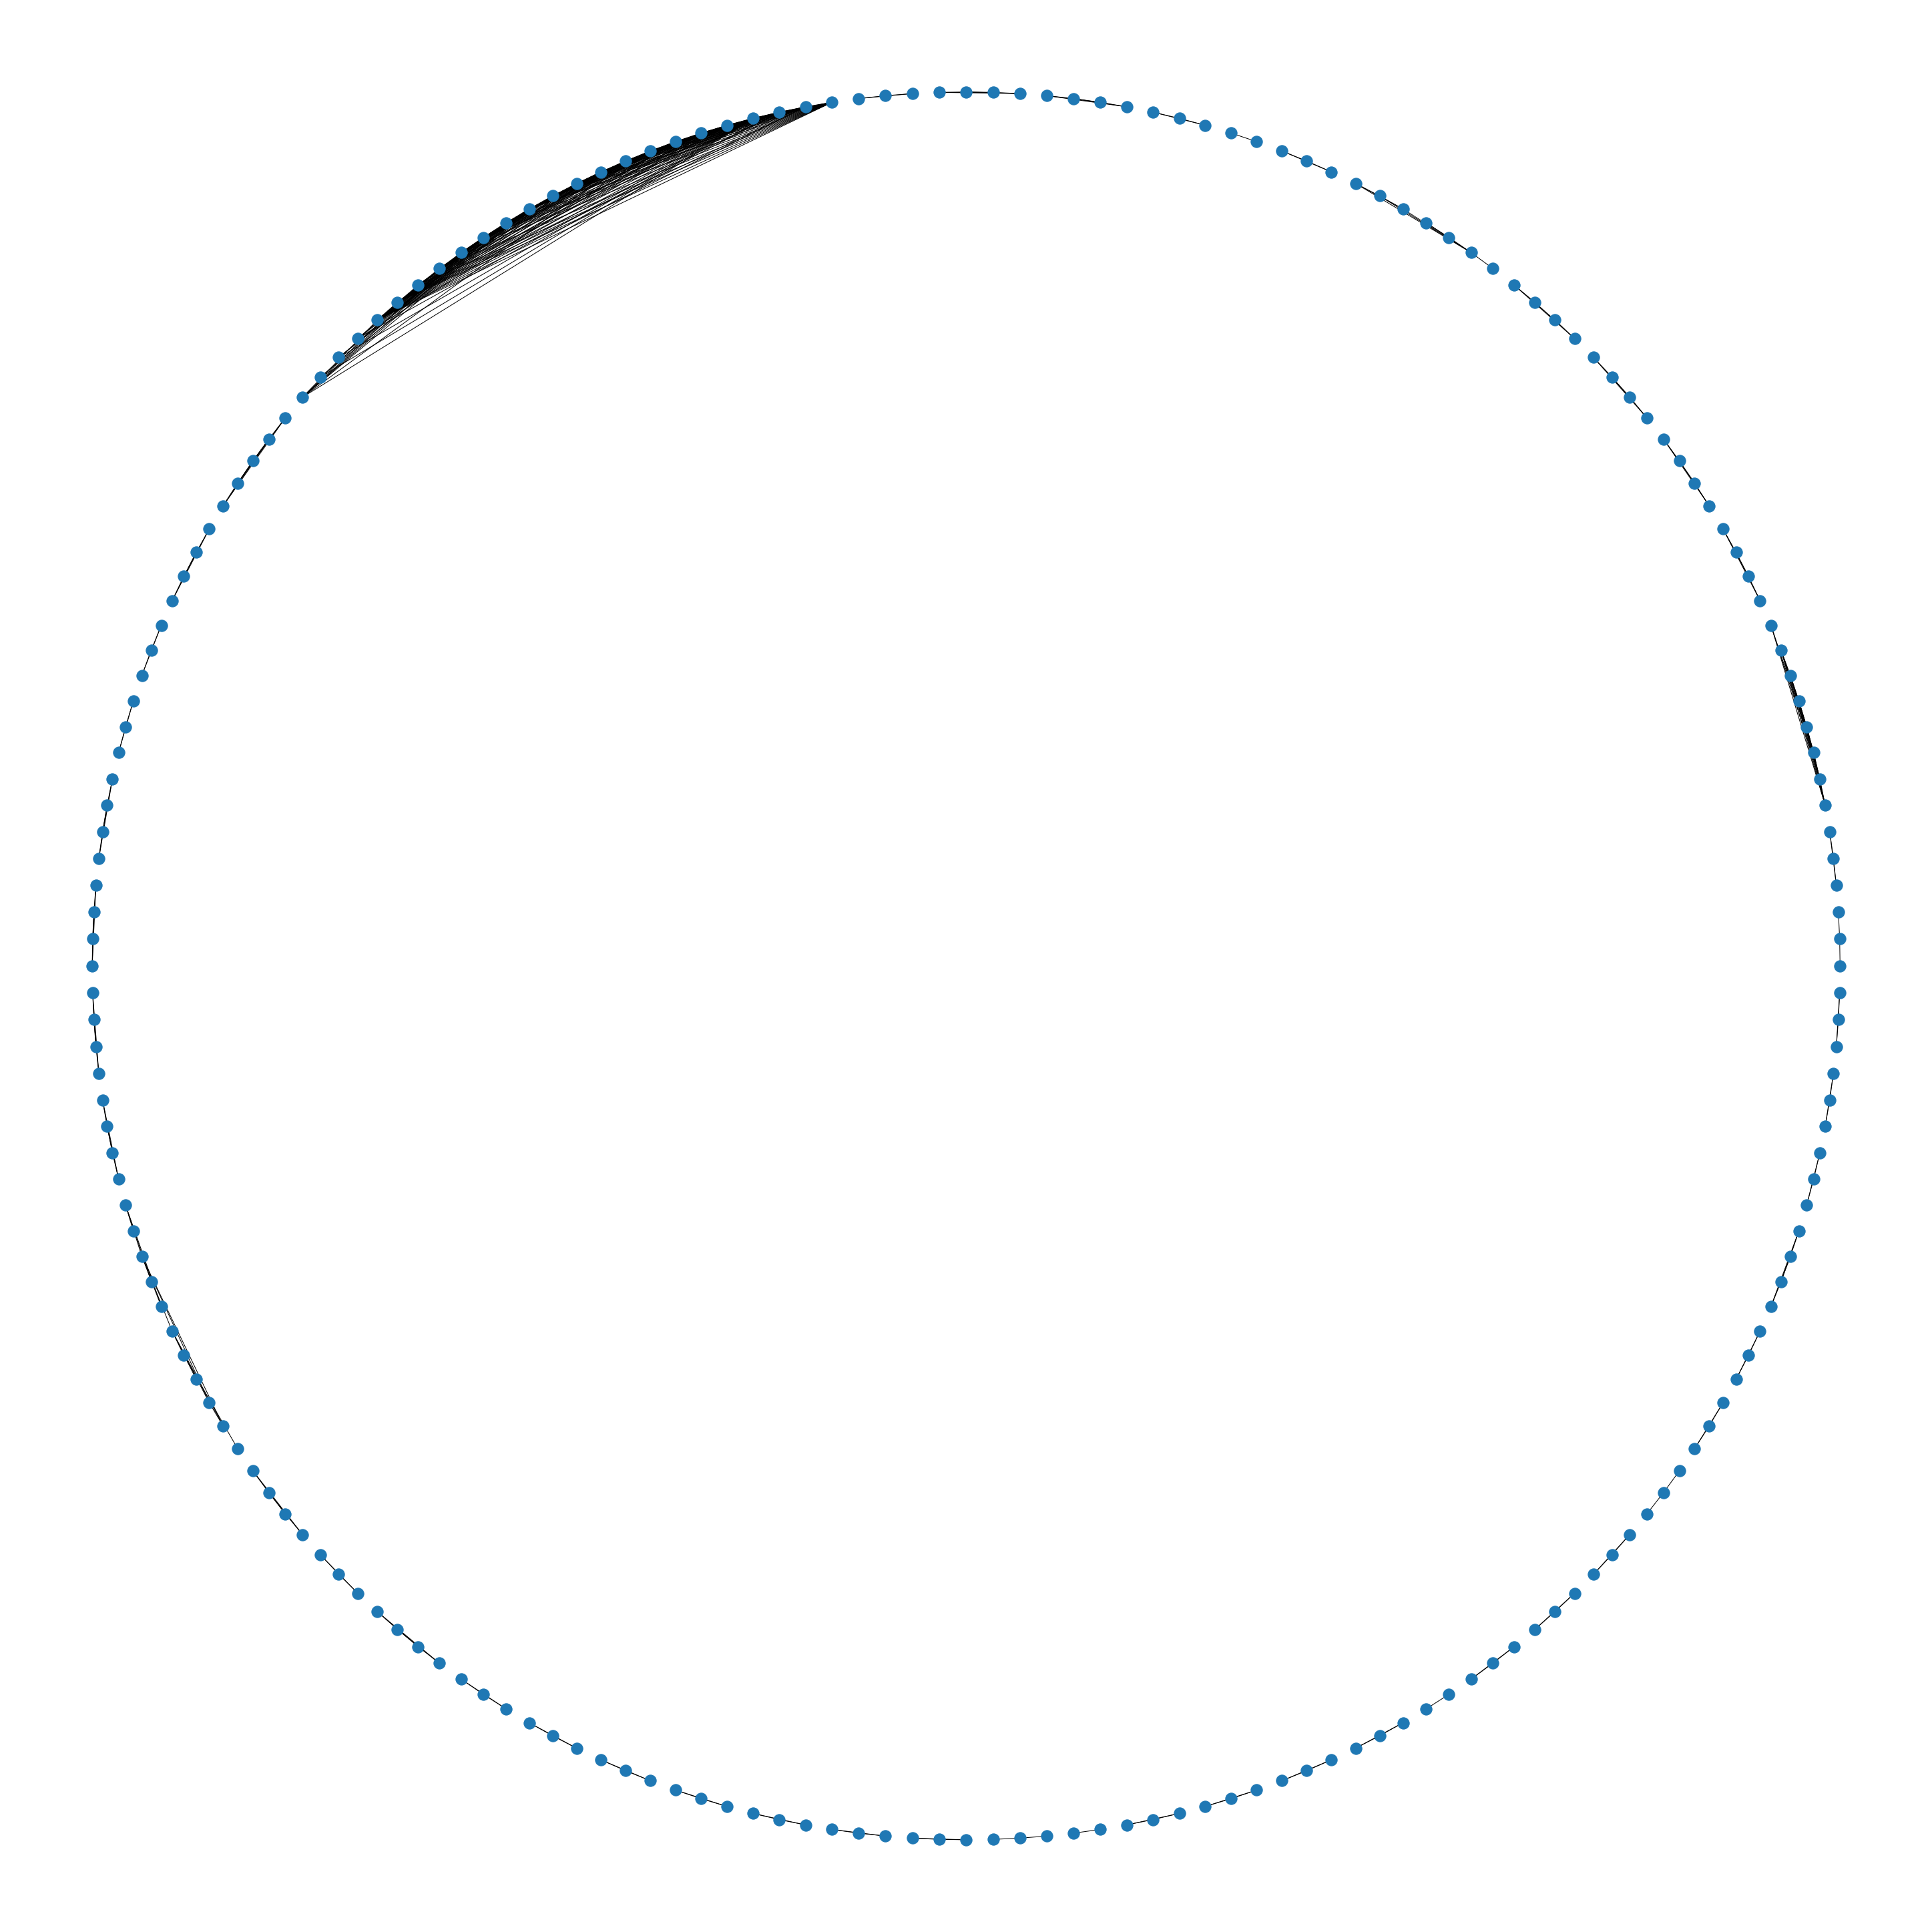

In [207]:
pos = nx.circular_layout(big_G)
#pos = nx.spring_layout
# default
plt.figure(1)
nx.draw(big_G,pos)
# smaller nodes and fonts
plt.figure(2)
nx.draw(big_G,pos,node_size=60,font_size=8) 
# larger figure size
plt.figure(3,figsize=(40,40)) 
nx.draw(big_G,pos)
plt.show()

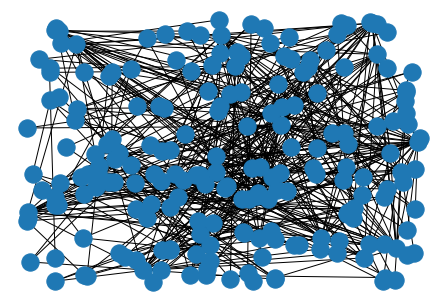

In [206]:
nx.draw_random(big_G)

In [334]:
f1_score(y_test, (gbt.predict(X_t)))

0.5789473684210527

In [1048]:
block

,id,title,authors,venue,year,Blocking_key
14713,VZreOrzvcYEJ,YOURMEDIATORSNEEDDATACONVERSION,CDELOBELJSIMEONKSMAGASCLUET,PROCOFTHEACMSIGMOD,,YOURMEDIATORSNEEDDATACONVERSION
55172,i2rbviV_9VgJ,YOURMEDIATORSNEEDDATACONVERSION,KSMAGASCCDJSIMGON,,,YOURMEDIATORSNEEDDATACONVERSION
62809,lOZF0Ee3rUQJ,YOURMEDIATORSNEEDDATACONVERSION,CDELOBELSCLUET,,,YOURMEDIATORSNEEDDATACONVERSION


In [1459]:
#Pipeline cora
dataset = cora #dblp.append(scholar)